In [1]:
# Libriaries
import pandas as pd
import numpy as np

import datetime

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


from collections import Counter

from operator import itemgetter

import scipy.stats as st
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')

# scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

from sklearn.feature_selection import RFE

In [2]:
# Pandas(jupyter) max rows setting for convenience
# pd.set_option('display.max_rows', 2500)
# pd.set_option('display.max_columns', 100) 

In [3]:
# Fnction for displaying dataframes side by side
from IPython.display import display_html
from itertools import chain,cycle

def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h3>{title}</h3>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [4]:
# Visits raw data
visits_raw_data = pd.read_excel('exemplary_data.xlsx')

display_side_by_side(visits_raw_data.head(10),visits_raw_data.tail(10), titles=['visits head','visits tail'])

,Data,godzina,Wizyty_all
0,2014-10-01,0,1589
1,2014-10-01,1,658
2,2014-10-01,2,299
3,2014-10-01,3,211
4,2014-10-01,4,257
5,2014-10-01,5,544
6,2014-10-01,6,2149
7,2014-10-01,7,10306
8,2014-10-01,8,17519
9,2014-10-01,9,24991


In [5]:
# Spots raw data
spots_raw_data = pd.read_excel('exemplary_data.xlsx',sheet_name=1)

display_side_by_side(spots_raw_data.head(10),spots_raw_data.tail(10), titles=['spots head','spots tail'])


,Campaign Channel,AGB Channel,Date,Time,Timeband,BreakType (Block type),Title,Position Type in the block of commercials,Commercial length,GRP
0,TVN Pakiet Tematyczny,FoxLife,2014-11-10,06:10:25,Day,Between,ZONA DLA MILIONERA /PROG.ROZR.USA/,Middle,30,0.0
1,TVP Pakiet Tematyczny,TVP Seriale,2014-11-10,06:11:50,Day,After,LOKATORZY /SER.KOM.POL./,Middle,30,0.0
2,TVN Pakiet Tematyczny,Mjuzik.tv,2014-11-10,06:12:59,Day,Between,TELEDYSKI,Middle,30,0.0
3,TVN Pakiet Tematyczny,MTV Polska,2014-11-10,06:19:06,Day,Between,PIMP MY RIDE,Middle,30,0.0
4,TVN Pakiet Tematyczny,Comedy Central Family,2014-11-10,06:42:34,Day,Between,DALEKO JESZCZE? /SER.KOM.USA/,Middle,30,0.0
5,TVN Pakiet Tematyczny,Animal HD,2014-11-10,06:47:47,Day,Between,WSZYSTKO O PSACH /SER.DOK.PRZYR.USA/,Second / Penultimate,30,0.0
6,Polsat Pakiet Tematyczny,TV6,2014-11-10,06:53:21,Day,Between,SPADKOBIERCY /PROG.ROZR.POL./,Second / Penultimate,30,0.0
7,Polsat Pakiet Tematyczny,Polsat Food,2014-11-10,07:03:29,Day,Between,KROL KANAPEK /PROG.KUL.USA/,First / Last,30,0.0
8,Polsat Pakiet Tematyczny,BBC Knowledge,2014-11-10,07:03:34,Day,After,TOP GEAR,Middle,30,0.0
9,TVN Pakiet Tematyczny,MTV Polska,2014-11-10,07:05:22,Day,Between,PIMP MY RIDE BY COCA COLA ZERO,Middle,30,0.0


---
---
# Exploratory Data Analysis


In [6]:
# Size of both data sets
print("visits_raw_data: ", visits_raw_data.shape,"\nspots_raw_data: ", spots_raw_data.shape)

visits_raw_data:  (2208, 3) 
spots_raw_data:  (2207, 10)


In [7]:
# Checking if there are any missing values in both data sets
print("Visits: ", visits_raw_data.isna().any().any(),"\nSpots: ",spots_raw_data.isna().any().any())

Visits:  False 
Spots:  False


In [8]:
# Data types in visits
visits_raw_data.dtypes

Data          datetime64[ns]
godzina                int64
Wizyty_all             int64
dtype: object

In [9]:
# Data types in spots
spots_raw_data.dtypes

Campaign Channel                                     object
AGB Channel                                          object
Date                                         datetime64[ns]
Time                                                 object
Timeband                                             object
BreakType (Block type)                               object
Title                                                object
Position Type in the block of commercials            object
Commercial length                                     int64
GRP                                                 float64
dtype: object

/home/john/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/john/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Normal'}, xlabel='Wizyty_all'>

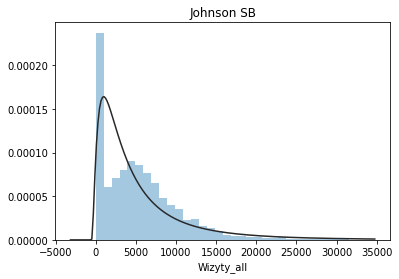

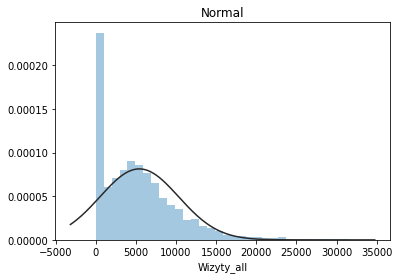

In [10]:
# Exploring distribution of dependent variable - "Wizyty_all"
# Johnson SU is useful for modeling distributions that have heavy tails
y = visits_raw_data['Wizyty_all']
plt.figure(1); plt.title('Johnson SB')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)



#### Distribution of dependent value (Wizyty_all) is positevely skewed (skewed to the right)

In [11]:
# Unique values in visits per column 
for i in visits_raw_data.columns:
    print (i,visits_raw_data[str(i)].nunique())

Data 92
godzina 24
Wizyty_all 1938


In [12]:
# Unique values in spots per column
for i in spots_raw_data.columns:
    print (i,spots_raw_data[str(i)].nunique())

Campaign Channel 7
AGB Channel 59
Date 14
Time 2151
Timeband 3
BreakType (Block type) 3
Title 893
Position Type in the block of commercials 3
Commercial length 1
GRP 407


In [13]:
# Value_counts() per column with less than 20 labels
for i in spots_raw_data.columns:
    if spots_raw_data[str(i)].value_counts().count() <20:
        print('\n\n--------',i,'--------\n', spots_raw_data[str(i)].value_counts())



-------- Campaign Channel --------
 TVN Pakiet Tematyczny       1096
Polsat Pakiet Tematyczny     546
TVP Pakiet Tematyczny        352
TVP1                          70
TVP2                          60
Polsat                        49
TVN                           34
Name: Campaign Channel, dtype: int64


-------- Date --------
 2014-11-11    236
2014-11-12    230
2014-11-10    216
2014-11-15    187
2014-11-16    179
2014-11-13    176
2014-11-14    149
2014-11-18    133
2014-11-23    133
2014-11-17    126
2014-11-20    114
2014-11-21    111
2014-11-22    110
2014-11-19    107
Name: Date, dtype: int64


-------- Timeband --------
 Day      1319
Prime     477
Night     411
Name: Timeband, dtype: int64


-------- BreakType (Block type) --------
 Between    1374
After       520
Before      313
Name: BreakType (Block type), dtype: int64


-------- Position Type in the block of commercials --------
 Middle                  1652
Second / Penultimate     347
First / Last             208
Name:

In [14]:
# Value_counts() for agb_channel
spots_raw_data['AGB Channel'].value_counts(normalize=True)[:20]

FoxLife                    0.049388
TLC                        0.038967
VH1 Europe                 0.035795
Investigation Discovery    0.034889
MTV Polska                 0.033530
Mjuzik.tv                  0.032623
Animal HD                  0.032623
TVN Style                  0.032623
TVP Regionalna             0.032170
TVP1                       0.031717
TVP Historia               0.030811
Comedy Central Family      0.030358
TVP Kultura                0.029905
Animal Planet              0.029905
TV.DISCO                   0.029905
TVP Seriale                0.029452
AXN                        0.028546
AXN White                  0.028092
TVP2                       0.027186
Domo                       0.027186
Name: AGB Channel, dtype: float64

---
# Approach
---
From business perspective (and aim of that project) is to obtain the most interpretable model possible.
Linear regression is a model that performs exceptionally well when it comes to explainability. It's widely used in business because of couple properties:

1. They're a good baseline.
2. They often perform "well enough" on small/medium data (which contrary to the big data hype, is still very popular).
3. __They're useful when interpretability is important.__


## Methodology

1.EDA
    -
    -
    -
    
    
2. Feature selection methods for linear regression models

2. 
Motivation behind the model choice: this is not regular time series problem, can be treated as linear regression problem. For that features will be groupped by hour (time intervfal of 1h - as per dependent variable format).

Comments:

* Considered transformations for distributon of dependent value (like box-cox or log) to correct the positive skewed distribution to approach normal distribution. Such transformations might optimize the model but if lambda is some non-zero number (in this case 0.34), then the transformed target variable may be more difficult to interpret than if we simply applied a log transform.

LOG: Only the dependent/response variable is log-transformed. Exponentiate the coefficient, subtract one from this number, and multiply by 100. This gives the percent increase (or decrease) in the response for every one-unit increase in the independent variable. Example: the coefficient is 0.198. (exp(0.198) – 1) * 100 = 21.9. For every one-unit increase in the independent variable, our dependent variable increases by about 22%.

* regularization


---
---
# Preliminary feature processing

#### based on EDA


### __spots__

    * Renaming columns
    * Cleaning "spots_time" column, correcting date and time
    * Combining "spots_date" and "time" columns
    * Setting Index to DateTimeIndex on "spots_date_time"
    * Transforming all strings in dataframe to lowercase
    * Extracting keywords from "title" column 
    * Transforming "title" column to multiple keyword columns
    * Rounding integer obesevations in "grp" column
    * Adding new column "is_free", checking if it working day (weekends + holidays)
    * Removing columns
    
### __visits__

    * Renaming columns
    * Combining "visits_date" and "time_visits" to visits_date_time
    * Setting Index to DateTimeIndex on "visits_date_time"
    * Removing columns

### Processing spots

In [15]:
# Renaming columns
new_feature_names = {
    "Campaign Channel":"campaign_channel",
    "AGB Channel":"agb_channel",
    "Date":"spots_date",
    "Time":"spots_time",
    "Timeband":"timeband",
    "BreakType (Block type)":"break_type",
    "Title":"title",
    "Position Type in the block of commercials":"position",
    "GRP":"grp"}

spots_raw_data.rename(columns=new_feature_names, inplace=True)

In [16]:
# Cleaning "time" column

# Assigning +1 day to date whenever the time is "24:mm:ss" and "25:mm:ss"
spots_raw_data["spots_date"] = spots_raw_data.apply(
    lambda x: x["spots_date"] + datetime.timedelta(days=1) if x["spots_time"][:2]=='24' or x["spots_time"][:2]=='25'  else x["spots_date"], axis=1)

# Replacing "24:mm:ss" and "25:mm:ss" time to 00 and 01
spots_raw_data["spots_time"] = spots_raw_data["spots_time"].str.replace('24:','00:').str.replace('25:','01:')

# Combining "spots_date" and "spots_time" together
spots_raw_data["spots_date_time"] = pd.to_datetime(spots_raw_data["spots_date"].dt.strftime('%d-%m-%Y') + spots_raw_data["spots_time"], format='%d-%m-%Y%H:%M:%S')

# Swapping Index to spots_date_time in DateTimeIndex for hourly resampling
spots_raw_data = spots_raw_data.set_index(pd.DatetimeIndex(spots_raw_data['spots_date_time']))

In [17]:
# Transforming all strings to lowercase
spots_raw_data = spots_raw_data.applymap(lambda s:s.lower() if type(s) == str else s)

In [18]:
# Extracting keywords from "title" column

# Removing special characters (limited)
spots_raw_data['title'] = spots_raw_data['title'].str.replace('\.|/|-', " ")

# Getting most common words
common_words = Counter(" ".join(spots_raw_data['title'].str.lower()).split()).most_common()

# Getting keywords that occure more than 5% (sum of keywords / number of observations) 
genre_keywords = [x[0] for x in common_words if x[1]/spots_raw_data['title'].shape[0]*100>5]

# Filtering polish stop words - custom stop word file for ntlk library
title_keywords = [word for word in genre_keywords if word not in stopwords.words('polish')]

/tmp/ipykernel_974433/74765320.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  spots_raw_data['title'] = spots_raw_data['title'].str.replace('\.|/|-', " ")


In [19]:
# Transforming "title" column to top 5% keyword columns and assiging 1/0 whether the keyword occurs in title
for i in title_keywords:
    spots_raw_data[i] = spots_raw_data.apply(lambda x: i in x.title, axis=1)


In [20]:
# Rounding integer obesevations in "grp" column
spots_raw_data['grp'] = spots_raw_data['grp'].round(2)

In [21]:
# # Adding new column "is_free", checking if it working day (weekends + holidays)
# # Adding the polish national holiday on 11.11.2014
spots_raw_data["is_free"] = (spots_raw_data["spots_date_time"].dt.weekday >= 5)|(spots_raw_data["spots_date_time"].dt.date.astype(str) == "2014-11-11")

# Transforming all bool values to binary
spots_raw_data.replace({False: 0, True: 1}, inplace=True)

In [22]:
spots_raw_data

,campaign_channel,agb_channel,spots_date,spots_time,timeband,break_type,title,position,Commercial length,grp,...,pol,dok,prog,film,kom,muz,teledyski,bryt,obycz,is_free
spots_date_time,,,,,,,,,,,,,,,,,,,,,
2014-11-10 06:10:25,tvn pakiet tematyczny,foxlife,2014-11-10,06:10:25,day,between,zona dla milionera prog rozr usa,middle,30,0.00,...,0,0,1,0,0,0,0,0,0,0
2014-11-10 06:11:50,tvp pakiet tematyczny,tvp seriale,2014-11-10,06:11:50,day,after,lokatorzy ser kom pol,middle,30,0.00,...,1,0,0,0,1,0,0,0,0,0
2014-11-10 06:12:59,tvn pakiet tematyczny,mjuzik.tv,2014-11-10,06:12:59,day,between,teledyski,middle,30,0.00,...,0,0,0,0,0,0,1,0,0,0
2014-11-10 06:19:06,tvn pakiet tematyczny,mtv polska,2014-11-10,06:19:06,day,between,pimp my ride,middle,30,0.00,...,0,0,0,0,0,0,0,0,0,0
2014-11-10 06:42:34,tvn pakiet tematyczny,comedy central family,2014-11-10,06:42:34,day,between,daleko jeszcze? ser kom usa,middle,30,0.00,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-11-24 00:32:15,tvn pakiet tematyczny,kuchnia.tv,2014-11-24,00:32:15,night,after,przez dziurke od sera prog porad pol,middle,30,0.00,...,1,0,1,0,0,0,0,0,0,0
2014-11-24 00:46:21,tvn pakiet tematyczny,comedy central family,2014-11-24,00:46:21,night,between,cougar town miasto kocic ser kom usa,middle,30,0.00,...,0,0,0,0,1,0,0,0,0,0
2014-11-24 01:11:09,polsat pakiet tematyczny,atm rozrywka,2014-11-24,01:11:09,night,between,synowie ser kom pol,middle,30,0.00,...,1,0,0,0,1,0,0,0,0,0


In [23]:
# Removing "Commercial length", "spots_date", "spots_time" and "spots_date_time" columns
spots_raw_data.drop(columns=[
    "Commercial length",
    "spots_date",
    "spots_time",
    "spots_date_time",
    "title"],inplace=True)

###  Processing visits

In [24]:
# Renaming columns
new_column_names = {
    "Data":"visits_date",
    "godzina":"visits_time",
    "Wizyty_all":"visits_hourly"}

visits_raw_data.rename(columns=new_column_names, inplace=True)

In [25]:
# Rebuilding full datetime format for "visits_time"
visits_raw_data["visits_time"] = visits_raw_data["visits_time"].apply(lambda x: str(datetime.timedelta(hours=x))).astype("string")

# Combining "visits_date" and "visits_time" to "visits_date_time"
visits_raw_data["visits_date_time"] = pd.to_datetime(visits_raw_data["visits_date"].dt.strftime('%d-%m-%Y') + visits_raw_data["visits_time"], format='%d-%m-%Y%H:%M:%S')

# Swapping Index to spots_date_time in DateTimeIndex for hourly resampling
visits_data = visits_raw_data.set_index(pd.DatetimeIndex(visits_raw_data['visits_date_time']))


In [26]:
# Removing "visits_date", "visits_time" and "visits_date_time" columns
visits_data.drop(columns=["visits_date", "visits_time", "visits_date_time"], inplace=True)


### Dummy encoding, aggregation, merging


In [27]:
# Creating dummy variables for relevant columns
# agb_channel not taken into consideration at this time
# further with feature interactions / effects this column can be brough up back
dummies = [
    'campaign_channel',
#     'agb_channel',
    'timeband',
    'break_type',
    'position'
]

spots_data = pd.get_dummies(data=spots_raw_data, columns=dummies)

In [28]:
# Aggregation / grouping up the data by the hour
spots_data = spots_data.resample('H').sum()

In [29]:
# Merging visits and spots data sets on DateTimeIndexes
data = visits_data.merge(spots_data, left_on=visits_data.index, right_on=spots_data.index, how='right')
data.drop(columns=["key_0"],inplace=True)

---
---
# EDA on processed data


/tmp/ipykernel_974433/60538450.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


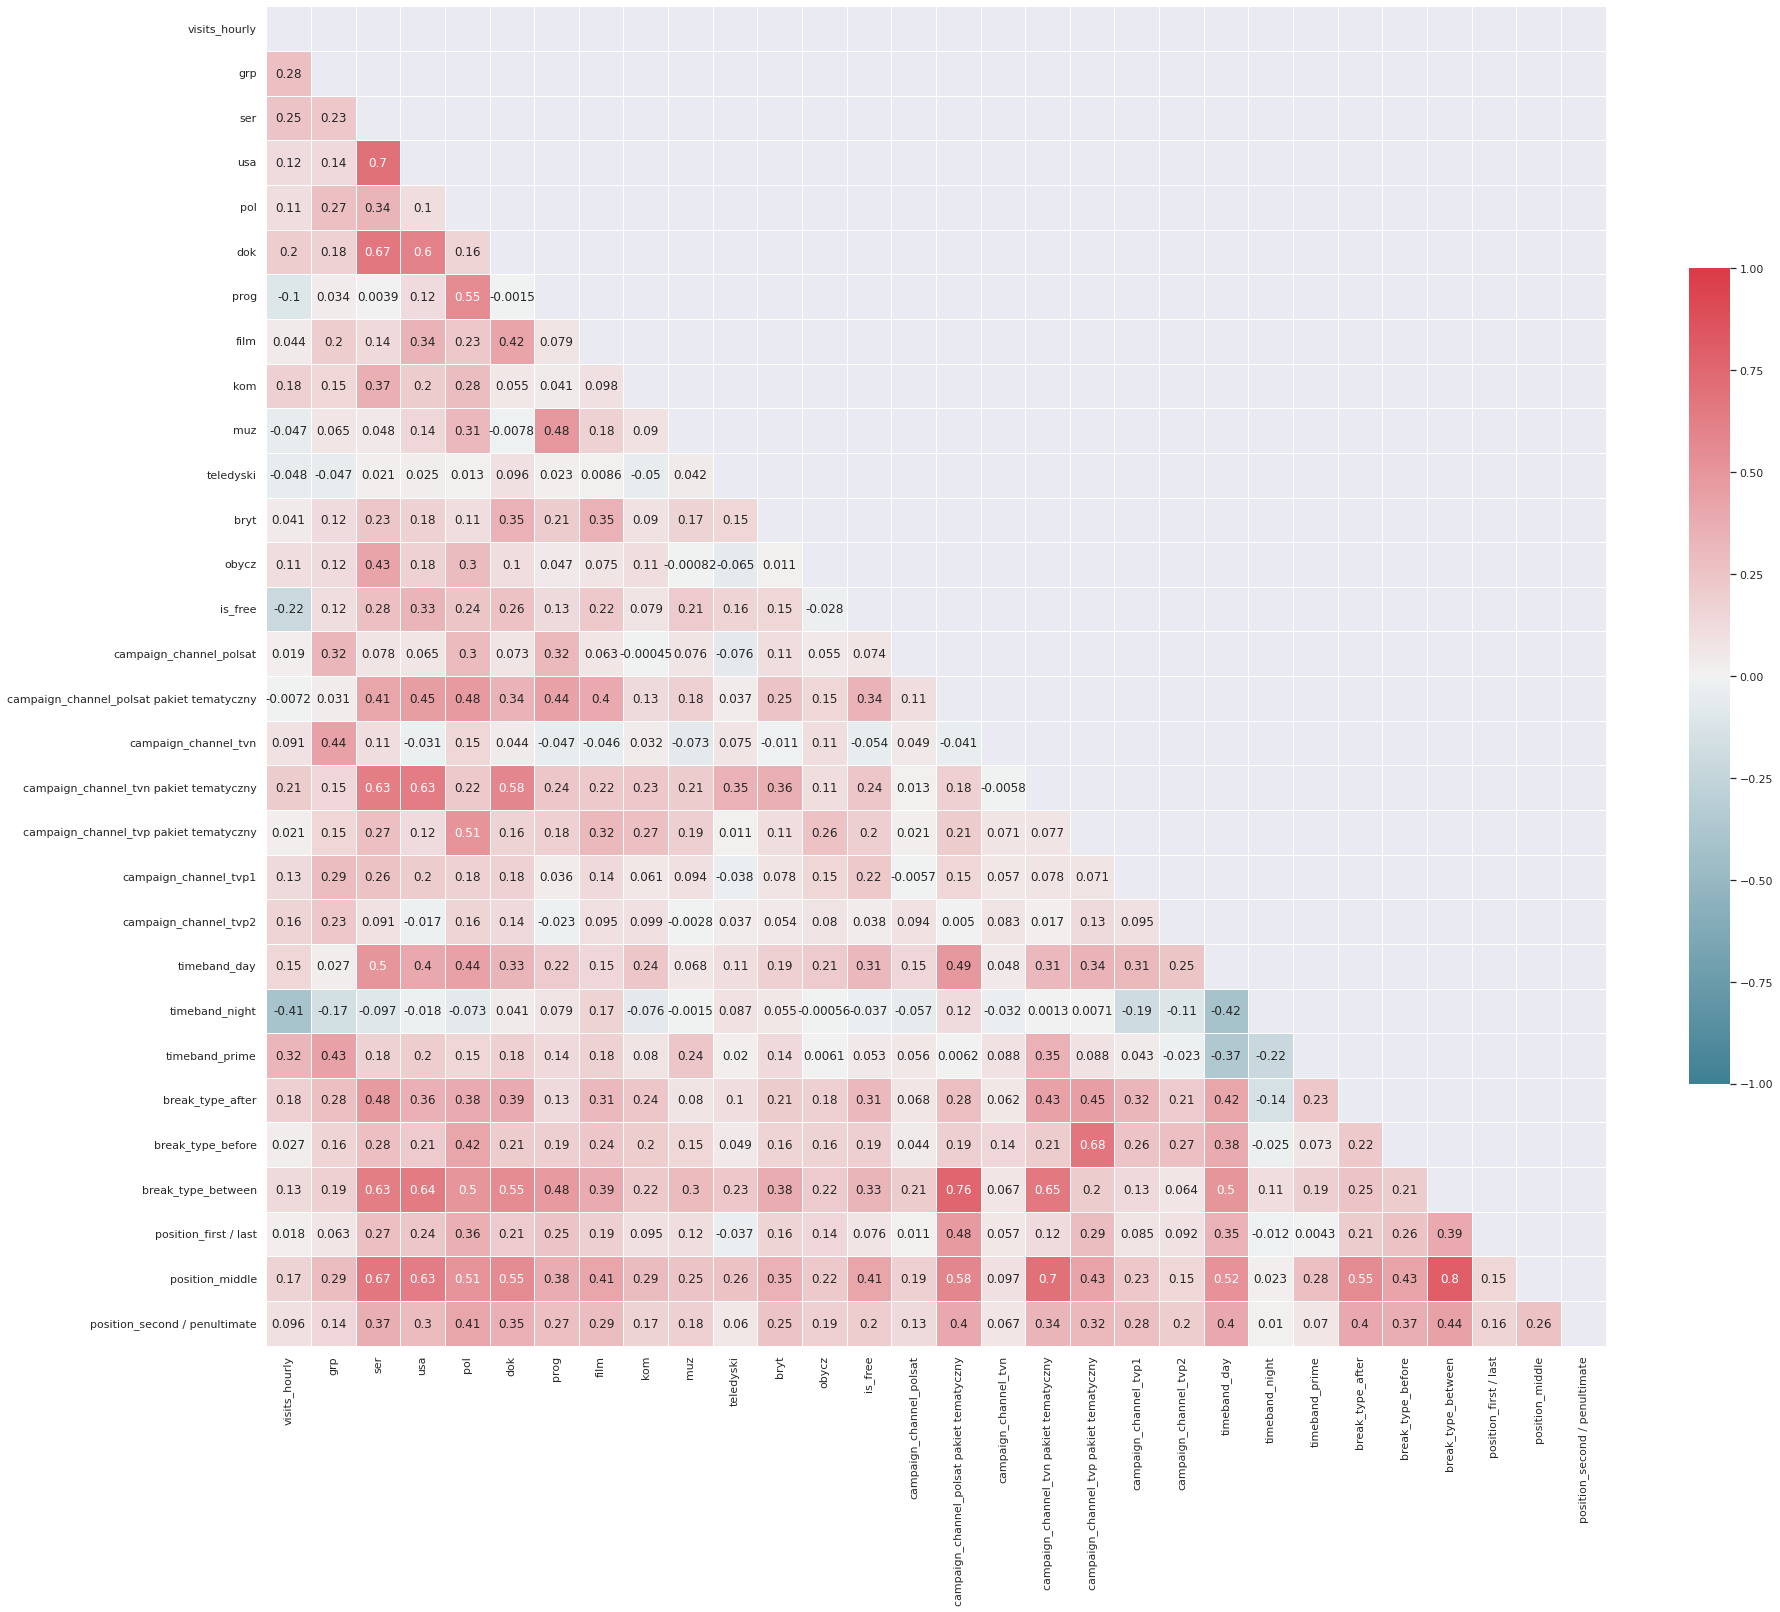

In [30]:
# Heatmap for correlation of features
sns.set(style="darkgrid")
corr = data.corr()

# Generating mask to cover the top triangle 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Figuresize
f, ax = plt.subplots(figsize=(30,30))

# Color palette
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, annot= True,
            square=True, xticklabels=1, yticklabels=1,
            linewidths=0.5, cbar_kws={"shrink": 0.5}, ax=ax)

plt.show()

#### One feature correlated stronger to the dependent value than others: timeband_nigh.
#### Multiple correlation between features suggest strong multicollinearity.
#### Although there are more tests and measures to be carried out. There are some high correlations between independent values that might suggest multicollinearity. This phenoment could occur on behalf on splitting "title" feature on keywords. Multiple keywords per one observation were present and would be highly linked like "usa ser", tv show that would be often produced in usa.

#### Possible solution: feature transformations, removing "time_band_night" or sum values of faetures i.e. ser + usa as it occurs in original dataset.

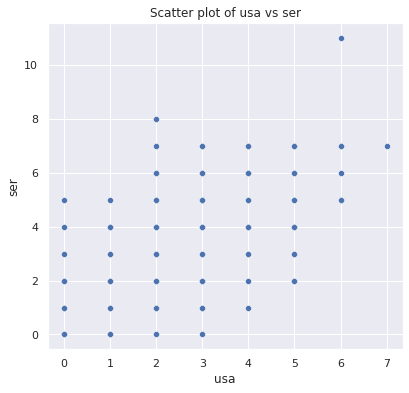

In [31]:
# Exploring relationship between "grp" (gross rating points) and "visits_hourly" 

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='usa',y='ser',data=data,palette='magma',ax=ax)
ax.set_title('Scatter plot of usa vs ser');

In [32]:
# # Pairplot

# sns.set()
# columns = list(data.columns)
# sns.pairplot(data[columns],height= 2 ,kind ='scatter',diag_kind='kde')
# plt.show()

#### Pairplot of this size is quite extensive, but it still can quickly explain a relationship between two variables.

---
---
## Linear Regression


In [33]:
# Splitting data into dependent and independent values
X = data.drop(columns=["visits_hourly"]).values
y = data['visits_hourly']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=123)

print(X_train.shape); print(X_test.shape)

(298, 29)
(34, 29)


In [34]:
# Function for calculating the model evaluating metrics with cross validation
def calc_results(model):
    results_cv = {}
    results_cv['r2'] = cross_val_score(estimator=model, X=X_train, y=y_train, scoring='r2', cv=10).mean()
    results_cv['mse'] = -cross_val_score(estimator=model, X=X_train, y=y_train, scoring='neg_mean_squared_error', cv=10).mean()
    results_cv['mae'] = -cross_val_score(estimator=model, X=X_train, y=y_train, scoring='neg_median_absolute_error', cv=10).mean()
    results_cv['mape'] = -cross_val_score(estimator=model, X=X_train, y=y_train, scoring='neg_mean_absolute_percentage_error', cv=10).mean()
    results_cv['r2_adj'] = (1 - (1 - results_cv['r2']) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1)))
    results_cv['r2-r2_adj'] = results_cv['r2'] - results_cv['r2_adj']
    return results_cv

In [35]:
def calc_results_test(model):
    results_cv = {}
    results_cv['r2'] = cross_val_score(estimator=model, X=X_test, y=y_test, scoring='r2', cv=10).mean()
    results_cv['mse'] = -cross_val_score(estimator=model, X=X_test, y=y_test, scoring='neg_mean_squared_error', cv=10).mean()
    results_cv['mae'] = -cross_val_score(estimator=model, X=X_test, y=y_test, scoring='neg_median_absolute_error', cv=10).mean()
    results_cv['mape'] = -cross_val_score(estimator=model, X=X_test, y=y_test, scoring='neg_mean_absolute_percentage_error', cv=10).mean()
    results_cv['r2_adj'] = (1 - (1 - results_cv['r2']) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)))
    results_cv['r2-r2_adj'] = results_cv['r2'] - results_cv['r2_adj']
    return results_cv

In [36]:
def train_test_score(model):
    
    pred_train_model= model.predict(X_train)
    pred_test_model= model.predict(X_test)
    
    train_error = np.sqrt(mean_squared_error(y_train,pred_train_model))
    train_r2 = r2_score(y_train, pred_train_model)
    
    test_error = np.sqrt(mean_squared_error(y_test,pred_test_model))
    test_r2 = r2_score(y_test, pred_test_model)
    
    return print("Train\nMSE: {}\nr2: {}\n -----------------\nTest\nMSE: {}\nr2: {}".format(train_error,train_r2,test_error,test_r2))

In [37]:
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

LinearRegression()

In [38]:
calc_results(lm1)

{'r2': 0.3011450864836348,
 'mse': 17616110.510014564,
 'mae': 2386.0691081654727,
 'mape': 2.9645820151357265,
 'r2_adj': 0.22552272643895355,
 'r2-r2_adj': 0.07562236004468126}

In [39]:
calc_results_test(lm1)

{'r2': -160.47956794616098,
 'mse': 128882785.86876747,
 'mae': 8974.010563865573,
 'mape': 7.52702002741743,
 'r2_adj': -1331.2064355558282,
 'r2-r2_adj': 1170.7268676096671}

In [40]:
scores = -cross_val_score(lm1, X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean()
scores

18453391.17217258

In [41]:
train_test_score(lm1)

Train
MSE: 3805.5533714203584
r2: 0.42920995978065135
 -----------------
Test
MSE: 2777.1571256508764
r2: 0.38623541858825217


---
---
# Ordinary least squares (OLS) regression with p-value assessment


In [42]:
X = data.drop(columns=["visits_hourly"]).values
y = data['visits_hourly']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary(xname=list(data.columns)))

                            OLS Regression Results                            
Dep. Variable:          visits_hourly   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     8.918
Date:                Thu, 05 May 2022   Prob (F-statistic):           9.06e-25
Time:                        09:25:56   Log-Likelihood:                -3199.4
No. Observations:                 332   AIC:                             6453.
Df Residuals:                     305   BIC:                             6556.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

#### A low p-value (< 0.05) indicates that you can reject the null hypothesis. In this case most of the p-values are high. High p-values indicate that the evidence is not strong enough to suggest an effect exists in the population. In this case its probably that effect might exist but it’s possible that the effect size is too small with the sample size that is too small (less than 300 observations)


---
---
# VIF value assessment

#### VIF is a number that determines whether a variable has multicollinearity or not. That number also represents how much a variable is inflated because of the linear dependence with other variables.

#### The VIF value starts from 1, and it has no upper limit. If the number gets larger, it means the variable has huge multicollinearity on it.

In [43]:
def Vif(dat):
    X = dat[list(dat.columns[1:])]

    vif_info = pd.DataFrame()
    vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_info['Column'] = X.columns
    return vif_info.sort_values('VIF', ascending=False)

Vif(data)

/home/john/.local/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,Column
14,inf,campaign_channel_polsat pakiet tematyczny
15,inf,campaign_channel_tvn
27,inf,position_middle
26,inf,position_first / last
25,inf,break_type_between
24,inf,break_type_before
23,inf,break_type_after
22,inf,timeband_prime
21,inf,timeband_night
20,inf,timeband_day


#### Inf - infinity values show a perfect correlation between two independent variables. In the case of perfect correlation, we get R2 =1, which lead to 1/(1-R2) infinity. To solve this problem we need to drop one of the variables from the dataset which is causing this perfect multicollinearity or transform those features into new ones.

#### From previous analys we know that some of those feature are highy correlated with eachoter

#### Solution: remove highly correlated features


1. Sum those features
2. Preserve signal/information with reducing the number of groups of correlated features

In [44]:
list(data.columns)

['visits_hourly',
 'grp',
 'ser',
 'usa',
 'pol',
 'dok',
 'prog',
 'film',
 'kom',
 'muz',
 'teledyski',
 'bryt',
 'obycz',
 'is_free',
 'campaign_channel_polsat',
 'campaign_channel_polsat pakiet tematyczny',
 'campaign_channel_tvn',
 'campaign_channel_tvn pakiet tematyczny',
 'campaign_channel_tvp pakiet tematyczny',
 'campaign_channel_tvp1',
 'campaign_channel_tvp2',
 'timeband_day',
 'timeband_night',
 'timeband_prime',
 'break_type_after',
 'break_type_before',
 'break_type_between',
 'position_first / last',
 'position_middle',
 'position_second / penultimate']

### Tuning VIF

In [45]:
vif_data = data.copy(deep=True)

# # Summing columns
# vif_data["position_middle_break_between"] = vif_data["position_middle"] + vif_data["break_type_between"]
vif_data.drop(columns=["timeband_night", "break_type_after", 'position_middle'], inplace=True)

In [46]:
Vif(vif_data)

,VIF,Column
23,35.967641,break_type_between
16,30.921482,campaign_channel_tvn pakiet tematyczny
1,24.538821,ser
14,15.666705,campaign_channel_polsat pakiet tematyczny
2,11.015588,usa
3,8.815991,pol
4,7.549486,dok
20,6.354455,timeband_day
5,6.182190,prog
17,6.144171,campaign_channel_tvp pakiet tematyczny


#### With removal of highly correlated features "timeband_night", "break_type_after", 'position_middle' 

In [47]:
data = vif_data

---
---

# Recursive Feature Elimination

#### The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain. It uses accuracy metric to rank the feature according to their importance. The RFE method takes the model to be used and the number of required features as input. It then gives the ranking of all the variables, 1 being most important.

In [48]:
# Preparing data format
X = data.drop(columns=["visits_hourly"]).values
y = data['visits_hourly']
train, test = train_test_split(data, test_size=0.10, random_state=123)
train_data = train
test_data  = test.drop(columns=["visits_hourly"])
target = 'visits_hourly'
X_train = train_data.select_dtypes(include=['number']).copy()
X_train = X_train.drop([target], axis=1)
y_train = train_data[target]
X_test  = test_data.select_dtypes(include=['number']).copy()

# Setting up regressor - random forest
regressor = RandomForestRegressor(n_estimators=100, max_depth=10)

# Performing RFE, here we want only one final feature, we do this to produce a ranking
n_features_to_select = 1
rfe = RFE(regressor, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

# Printing out the features in order of ranking

features = X_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

# Choosing top 10 featues and using them for the model
n_features_to_select = 10
rfe = RFE(regressor, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

# Model predictions on "visits_hourly" for the test data
predictions = rfe.predict(X_test)

#===========================================================================
# write out CSV submission file
#===========================================================================
output = pd.DataFrame({"Id":test_data.index, target:predictions})
output.to_csv('submission.csv', index=False)

1 grp
2 timeband_day
3 timeband_prime
4 is_free
5 ser
6 prog
7 campaign_channel_tvn pakiet tematyczny
8 break_type_between
9 dok
10 pol
11 usa
12 position_second / penultimate
13 campaign_channel_polsat pakiet tematyczny
14 campaign_channel_tvp pakiet tematyczny
15 break_type_before
16 campaign_channel_tvp1
17 kom
18 campaign_channel_tvp2
19 film
20 position_first / last
21 bryt
22 teledyski
23 muz
24 obycz
25 campaign_channel_tvn
26 campaign_channel_polsat


---
---
## Regularization models


#### Regularization can significantly reduce the variance of the model, without substantial increase in its bias. So the tuning parameter alpha controls the impact on bias and variance. As the value of alpha rises, it reduces the value of coefficients and thus reducing the variance. Till a point, this increase in alpa is beneficial as it is only reducing the variance(hence avoiding overfitting), without loosing any important properties in the data. But after certain value, the model starts loosing important properties, giving rise to bias in the model and thus underfitting. Therefore, the value of alpha will be carefully empirically selected.

In [49]:
# Function for aggregation of regularization results: coefficients and metrics
def regularization(method, alpha_coeff_list, max_iter_input=None):
    """max_iter_input, for Lasso sometimes its required to increase iteration so it can converge"""
    results = {}
    for i in alpha_coeff_list:
        reg = method(i,max_iter=max_iter_input)
        reg.fit(X_train, y_train)
        results[str(i)]=[reg.coef_, calc_results(reg),calc_results_test(reg)]
    return results

In [50]:
# Ridge regularization for 5 values of alpha
ridge_results = regularization(Ridge, [0.001, 0.01, 0.1,1,10,100])

In [51]:
# Calculated metrics for different ridge alpha
for i in ridge_results.keys():
    print('TRAIN', i, ' \n', ridge_results[i][1],"\n")
    print('TEST', i, ' \n', ridge_results[i][2],"\n")

TRAIN 0.001  
 {'r2': 0.3011471414828347, 'mse': 17616068.739213176, 'mae': 2386.0665411072214, 'mape': 2.964572794984866, 'r2_adj': 0.2340985277505605, 'r2-r2_adj': 0.06704861373227422} 

TEST 0.001  
 {'r2': -159.24969912035147, 'mse': 125665532.10458565, 'mae': 8807.396717712822, 'mape': 7.354184093597587, 'r2_adj': -754.4628672816569, 'r2-r2_adj': 595.2131681613055} 

TRAIN 0.01  
 {'r2': 0.30116562870322483, 'mse': 17615692.962307945, 'mae': 2386.043407753473, 'mape': 2.9644898106834896, 'r2_adj': 0.2341187886526117, 'r2-r2_adj': 0.06704684005061312} 

TEST 0.01  
 {'r2': -151.57134918860706, 'mse': 108589540.63710625, 'mae': 7720.516285885552, 'mape': 6.333998022124997, 'r2_adj': -718.2649318891475, 'r2-r2_adj': 566.6935827005404} 

TRAIN 0.1  
 {'r2': 0.30134973665573195, 'mse': 17611950.95353147, 'mae': 2385.809162718392, 'mape': 2.9636597028234055, 'r2_adj': 0.23432056009871727, 'r2-r2_adj': 0.06702917655701468} 

TEST 0.1  
 {'r2': -119.58399396393341, 'mse': 75158169.5057368

## Ridge (L2)

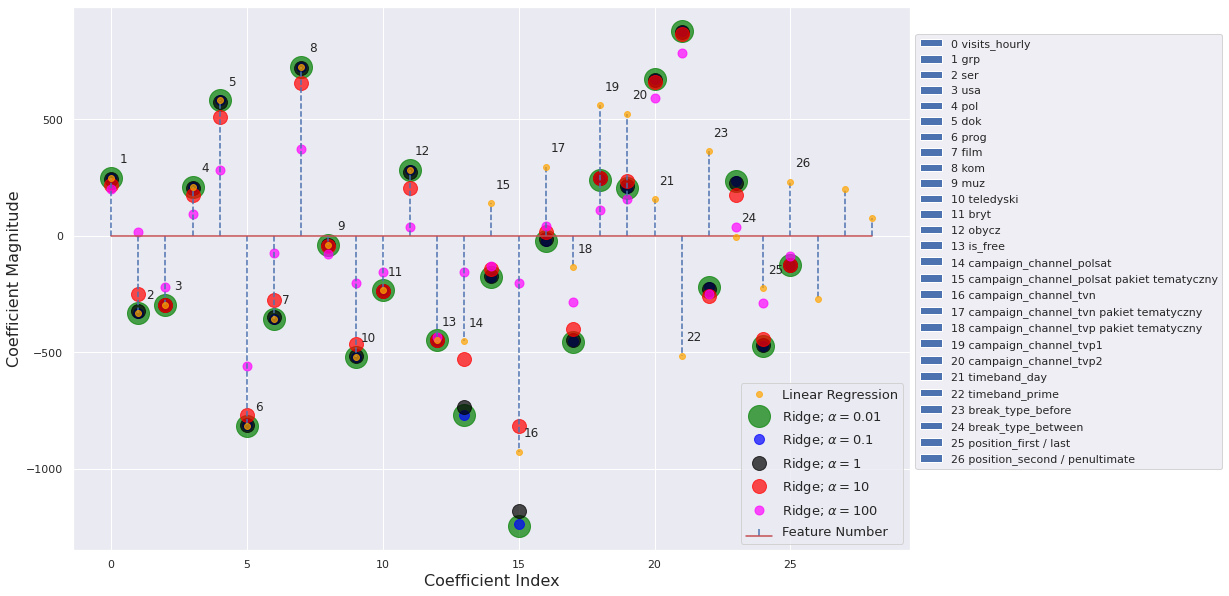

In [52]:
# Plotting coefficient magnitude graph for Ridge Regression (3 values of alpha) vs Linear Regression
x = np.arange(1,len(ridge_results["0.1"][0])+1)
y1 = lm1.coef_

plt.figure(figsize=(15,10))

# Plots, zorder for ordering the labels
plt.plot(y1, alpha=0.7,linestyle='none',marker='o',markersize=6,color='orange',label=r'Linear Regression',zorder=7) 
plt.plot(ridge_results["0.01"][0],alpha=0.7,linestyle='none',marker='o',markersize=22,color='green',label=r'Ridge; $\alpha = 0.01$', ) 
plt.plot(ridge_results["0.1"][0],alpha=0.7,linestyle='none',marker='o',markersize=10,color='blue',label=r'Ridge; $\alpha = 0.1$')
plt.plot(ridge_results["1"][0],alpha=0.7,linestyle='none',marker='o',markersize=14,color='black',label=r'Ridge; $\alpha = 1$') 
plt.plot(ridge_results["10"][0],alpha=0.7,linestyle='none',marker='o',markersize=14,color='red',label=r'Ridge; $\alpha = 10$')
plt.plot(ridge_results["100"][0],alpha=0.7,linestyle='none',marker='o',markersize=9,color='magenta',label=r'Ridge; $\alpha = 100$')

# Labels with feature names
for x,y in zip(x,y1):
    plt.annotate(x,                          # text
                 (x,y),                      # anchor point
                 textcoords="offset points", # text positioning type
                 xytext=(-15,15),            # distance to point
                 ha='center')                # horizontal/left/right/center positioning

# Supporting vertical lines
plt.stem(y1, markerfmt=' ', linefmt='--', label='Feature Number')

# Axis labels
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)

# Legend for numbers of features
feature_names = [(str(i) + ' ' + x) for i, x in enumerate(data.columns)]
l2 = plt.legend(bbox_to_anchor=(1, 0.96),handles=[mpatches.Patch(label=x) for x in feature_names])

# Adding second legend with feature names
plt.gca().add_artist(l2)

plt.legend(fontsize=13,loc=4)
plt.show()

## Lasso (L1)

In [53]:
lasso_results = regularization(Lasso, [0.01, 0.1,1,10,100],max_iter_input=10e5)

In [54]:
lasso_results

{'0.01': [array([  248.52799152,  -332.0421421 ,  -295.16190261,   210.351059  ,
           581.62769336,  -814.54885065,  -356.34181363,   725.67154503,
           -39.3081851 ,  -518.61692155,  -234.54771585,   282.33234783,
          -448.38297604,  -771.52501591,  -178.76083643, -1244.26017221,
           -23.22727232,  -454.35304281,   240.55638126,   204.91366461,
           671.78844334,   876.63194917,  -219.96936068,   235.90710215,
          -474.26676388,  -126.34263401]),
  {'r2': 0.3011499949372714,
   'mse': 17616025.352620646,
   'mae': 2386.046738734239,
   'mape': 2.964554792569827,
   'r2_adj': 0.2341016549681535,
   'r2-r2_adj': 0.06704833996911791},
  {'r2': -160.4004825145126,
   'mse': 128764032.46707363,
   'mae': 8966.560724831885,
   'mape': 7.521538162671581,
   'r2_adj': -759.8879889969879,
   'r2-r2_adj': 599.4875064824753}],
 '0.1': [array([  248.44209963,  -331.52225423,  -295.22495453,   210.1202407 ,
           581.23380719,  -814.40402994,  -355.8872521

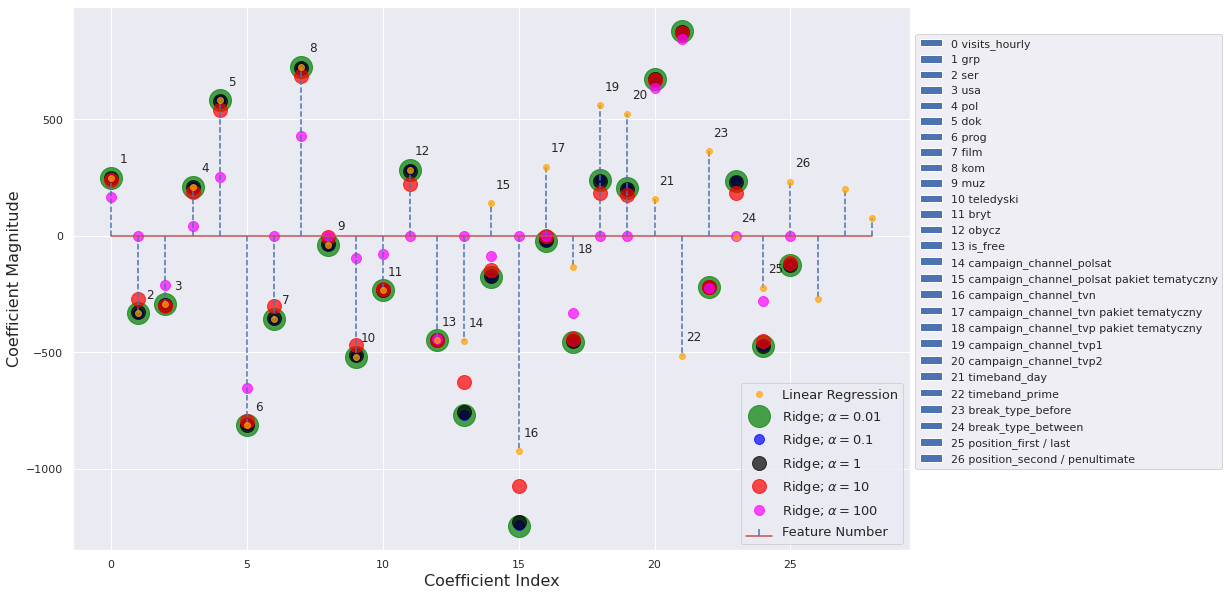

In [55]:
# Plotting coefficient magnitude graph for RLAssoRegression (4 values of alpha) vs Linear Regression
x = np.arange(1,len(lasso_results["0.1"][0])+1)
y1 = lm1.coef_

plt.figure(figsize=(15,10))

# Plots, zorder for ordering the labels
plt.plot(y1, alpha=0.7,linestyle='none',marker='o',markersize=6,color='orange',label=r'Linear Regression',zorder=7) 
plt.plot(lasso_results["0.01"][0],alpha=0.7,linestyle='none',marker='o',markersize=22,color='green',label=r'Ridge; $\alpha = 0.01$', ) 
plt.plot(lasso_results["0.1"][0],alpha=0.7,linestyle='none',marker='o',markersize=10,color='blue',label=r'Ridge; $\alpha = 0.1$')
plt.plot(lasso_results["1"][0],alpha=0.7,linestyle='none',marker='o',markersize=14,color='black',label=r'Ridge; $\alpha = 1$') 
plt.plot(lasso_results["10"][0],alpha=0.7,linestyle='none',marker='o',markersize=14,color='red',label=r'Ridge; $\alpha = 10$')
plt.plot(lasso_results["100"][0],alpha=0.7,linestyle='none',marker='o',markersize=10,color='magenta',label=r'Ridge; $\alpha = 100$')


# Labels with feature names
for x,y in zip(x,y1):
    plt.annotate(x,                          # text
                 (x,y),                      # anchor point
                 textcoords="offset points", # text positioning type
                 xytext=(-15,15),            # distance to point
                 ha='center')                # horizontal/left/right/center positioning

# Supporting vertical lines
plt.stem(y1, markerfmt=' ', linefmt='--', label='Feature Number')

# Axis labels
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)

# Legend for numbers of features
feature_names = [(str(i) + ' ' + x) for i, x in enumerate(data.columns)]
l2 = plt.legend(bbox_to_anchor=(1, 0.96),handles=[mpatches.Patch(label=x) for x in feature_names])

# Adding second legend with feature names
plt.gca().add_artist(l2)

plt.legend(fontsize=13,loc=4)
plt.show()

#### Variable selection (like in Lasso) is useful in our case where some predictors are not significant(p-value test) or predictors are highly correlated(VIF and correlations)

---
---

# Feature Interaction Effects



TBC